# NDVI-based approach to study Landslide areas

Research indicates that NDVI can play a crucial role in identifying landslide zones. While an advanced workflow is possible, this notebook opts for a simple approach using dNDVI and applying a threshold to the result to detect landslide occurred areas. Our analysis relies on the Sentinel-2 Level 2A collection fetched from the Copernicus Data Space Ecosystem using openEO.

Here, we do the test for [Ischia in Italy](https://en.wikipedia.org/wiki/2022_Ischia_landslide) for the fall of 2022, where several landsides were registered.

In [2]:
import openeo
from openeo.processes import min, max, mean
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
connection = openeo.connect("openeo.dataspace.copernicus.eu/").authenticate_oidc()

Authenticated using refresh token.


In [6]:
# load pre Sentinel2 collection

s2pre = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-08-25", "2022-11-25"],
    spatial_extent={
        "west": 13.882567409197492,
        "south": 40.7150627793427,
        "east": 13.928593792166282,
        "north": 40.747050251559216,
    },
    bands=["B04", "B08"],
)

In [7]:
# calculate pre NDVI and take a mean over temporal extent
prendvi = s2pre.ndvi().mean_time()

In [8]:
# load post Sentinel2 collection for same spatial extent

s2post = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-11-26", "2022-12-25"],
    spatial_extent={
        "west": 13.882567409197492,
        "south": 40.7150627793427,
        "east": 13.928593792166282,
        "north": 40.747050251559216,
    },
    bands=["B04", "B08"],
)

In [9]:
# calculate post NDVI and take a mean over temporal extent
postndvi = s2post.ndvi().mean_time()

In [11]:
# calculate difference in NDVI
diff = prendvi - postndvi

In [12]:
# lets execute the process
job = diff.execute_batch(
    title="NDVI diff", outputfile="NDVIDiff.tiff", output_format="GTiff"
)

0:00:00 Job 'j-240109d82860414296d87343c47c26d4': send 'start'
0:00:38 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:00:43 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:00:50 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:00:58 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:01:08 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:01:20 Job 'j-240109d82860414296d87343c47c26d4': created (progress N/A)
0:01:36 Job 'j-240109d82860414296d87343c47c26d4': running (progress N/A)
0:01:56 Job 'j-240109d82860414296d87343c47c26d4': running (progress N/A)
0:02:21 Job 'j-240109d82860414296d87343c47c26d4': running (progress N/A)
0:02:52 Job 'j-240109d82860414296d87343c47c26d4': running (progress N/A)
0:03:29 Job 'j-240109d82860414296d87343c47c26d4': running (progress N/A)
0:04:18 Job 'j-240109d82860414296d87343c47c26d4': finished (progress N/A)


In [13]:
# load the calculated data
img = rasterio.open("NDVIDiff.tiff").read(1)

### Let's put a threshold to define landslide areas. 

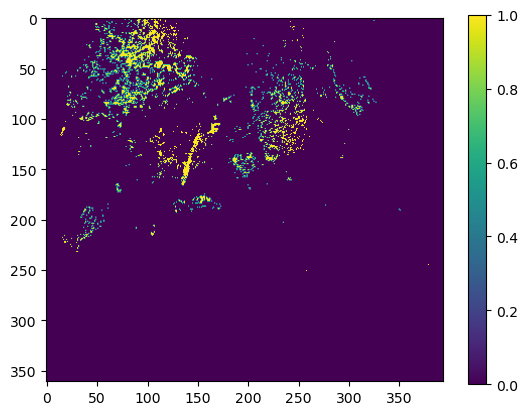

In [16]:
plt.imshow(img > 0.4, vmin=0, vmax=1)
plt.colorbar()

A general observation drawn from the aforementioned result is that the yellow regions indicate potential landslide activity or vegetation loss.

The yellowest region corresponds to an area where notably large landslides were recorded. However, some false landslides were also noticed in the northwest—an urban area; as there were not many reported landslides. Hence, it is conceivable that there was a loss of vegetation in that region.

### Compare the result with the ground truth as shown [here](https://en.wikipedia.org/wiki/2022_Ischia_landslide#/media/File:2022_Ischia_landslide_-_Copernicus_EMSR643.jpg) 

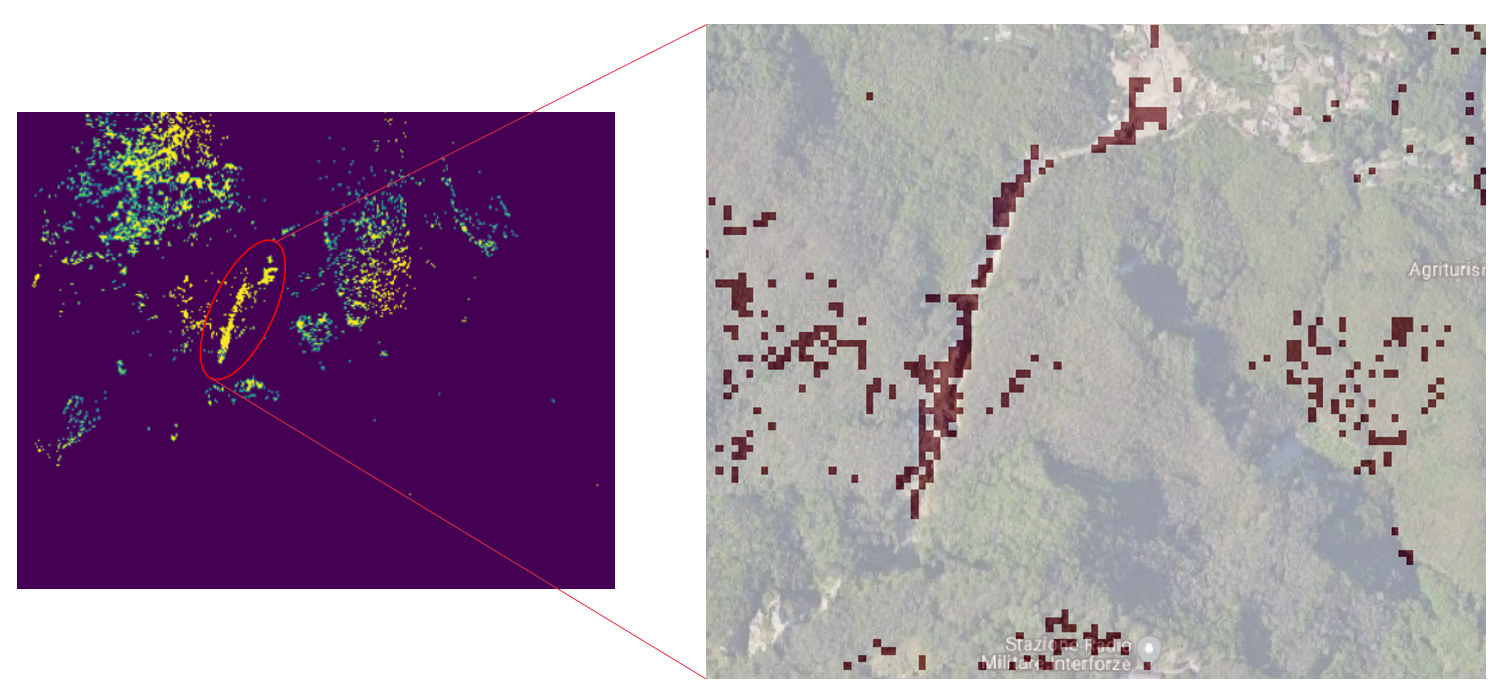